# Data Collection
MNIST data set is available in the tensorflow and keras libraries


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


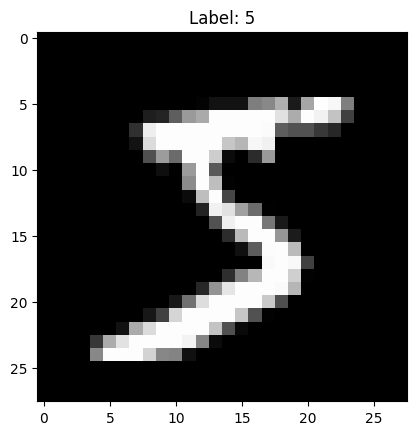

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the shapes of training and testing sets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Visualize the first digit in the training data
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


# Data Preprocessing
Normalizing pixel values to the range of 0 to 1 for better training performance.

also reshaping the data to include a channel dimension since we will be using Convolutional Neural Network (CNN)

In [2]:
# Normalize the pixel values from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension (required for CNN)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Print the new shape of the data
print(f"New training data shape: {X_train.shape}")
print(f"New testing data shape: {X_test.shape}")


New training data shape: (60000, 28, 28, 1)
New testing data shape: (10000, 28, 28, 1)


# Exploratory Data Analysis (EDA)

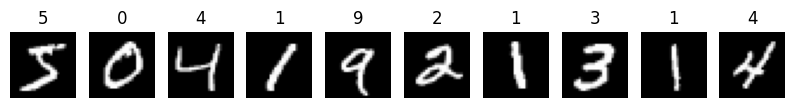

In [3]:
import matplotlib.pyplot as plt

# Plot the first 10 training images
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
plt.show()


# Model Building and Training


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 34ms/step - accuracy: 0.8901 - loss: 0.3520 - val_accuracy: 0.9842 - val_loss: 0.0491
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9859 - loss: 0.0480 - val_accuracy: 0.9908 - val_loss: 0.0289
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9900 - loss: 0.0336 - val_accuracy: 0.9902 - val_loss: 0.0325
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9913 - val_loss: 0.0280
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9878 - val_loss: 0.0376


# Evaluating the Model

In [5]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9828 - loss: 0.0487
Test accuracy: 0.9878, Test loss: 0.0376


# Make Predictions

In [6]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = predictions.argmax(axis=-1)

# Print the first 10 predictions and their corresponding true labels
print("Predicted classes:", predicted_classes[:10])
print("True labels:", y_test[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted classes: [7 2 1 0 4 1 4 9 5 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


Observations

Perfect Accuracy on Sample Predictions:

The model predicted all ten test samples correctly, showing that it can recognize and classify these digits without error. This further supports the high accuracy observed in the earlier evaluation.

Model Confidence:

While this shows that the model is functioning well on these examples, it’s also important to evaluate its performance across the entire test dataset to ensure that it generalizes effectively and doesn’t just fit well to specific samples.


## Visualize Predictions

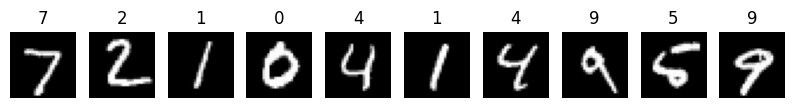

In [7]:
import matplotlib.pyplot as plt

# Plot the first 10 test images along with predictions
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(predicted_classes[i])
plt.show()


This looks good.

Summary of Model Performance

Accurate Classification:
The model correctly identified the digits 7, 2, 1, 0, 4, 1, 4, 9, 5, and 9 from the test images, confirming its ability to generalize well to unseen data.

Model Reliability:
High accuracy across the test samples suggests that your model is reliable for digit recognition tasks.

# Confusion Matrix
Let's see how the model performs across all digit classes.

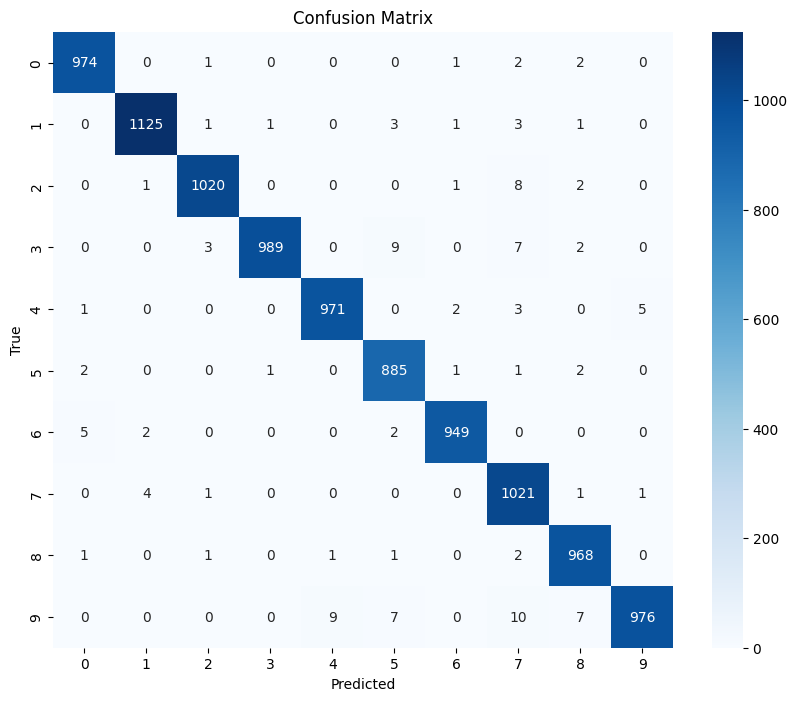

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Interpretation of Model Performance:

High Accuracy: Since most of the values are on the diagonal, the classifier performs well, making accurate predictions for most classes.

Confusions/Misclassifications:
Some misclassifications occur, especially between similar-looking classes (like predicting a 9 as a 4 or 8).

In summary, this confusion matrix indicates a strong model performance, but with room for improvement in certain misclassifications.

In [9]:
from sklearn.metrics import classification_report

# Get a classification report
report = classification_report(y_test, predicted_classes)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Understanding the Classification Report

Precision:

This measures the proportion of true positive predictions out of all positive predictions made. A high precision indicates that when the model predicts a class, it is usually correct.
For example, the precision for digit 7 is 0.97, meaning that 97% of the time the model predicted 7, it was correct.

Recall:

Also known as sensitivity, recall measures the proportion of true positives out of all actual instances of the class. A high recall indicates that the model can identify most of the actual instances.
For instance, the recall for digit 3 is 0.98, indicating that 98% of actual 3s were correctly identified by the model.

F1-Score:

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. A higher F1-score indicates better overall performance.
The F1-score for digit 5 is 0.98, suggesting a strong balance between precision and recall for this class.

Support:

This refers to the number of actual occurrences of each class in the specified dataset.
For example, there are 980 instances of digit 0 in the test set.

Accuracy:

Overall, the model achieved an accuracy of 0.99, meaning it correctly classified 99% of the 10,000 test samples.

Macro Avg and Weighted Avg:

Macro Average: This is the average performance across all classes, treating all classes equally.

Weighted Average: This takes into account the number of instances for each class, giving a more representative average, especially useful for imbalanced datasets.

Implications

Strong Performance: The model's performance is impressive, with all metrics above 0.97 across all classes, suggesting it is highly reliable for digit recognition.

Balanced Performance: The high recall and precision values indicate that the model is not only good at identifying digits but also minimizes false positives and negatives.

# Saving the model

In [10]:
# Save the trained model
model.save('handwritten_digit_recognition_model.h5')

# Download the saved model file
from google.colab import files
files.download('handwritten_digit_recognition_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>